1.4142135623730954


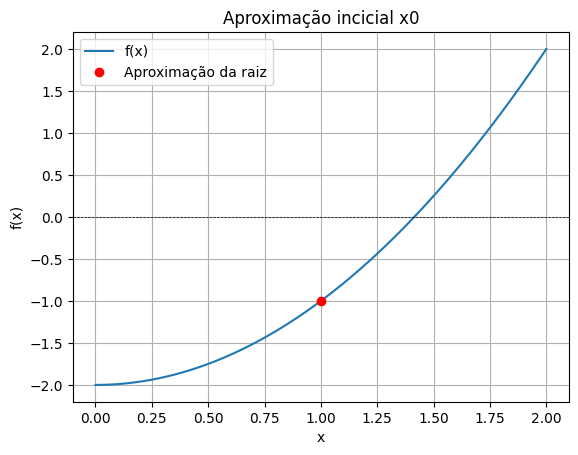

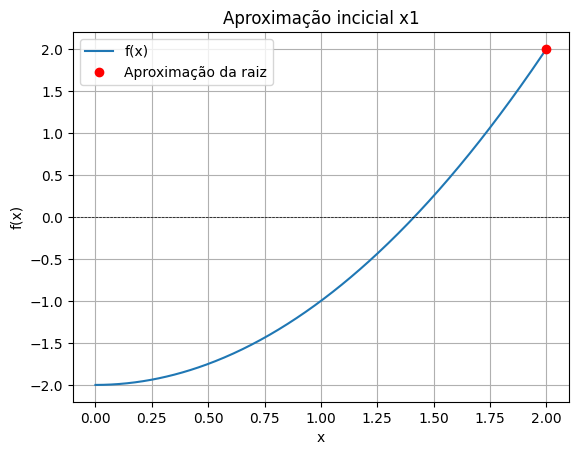

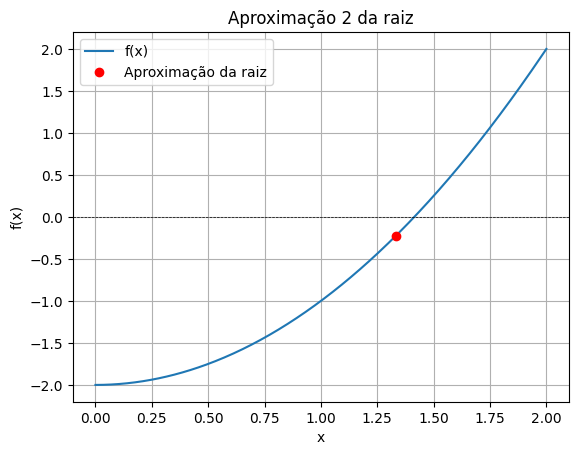

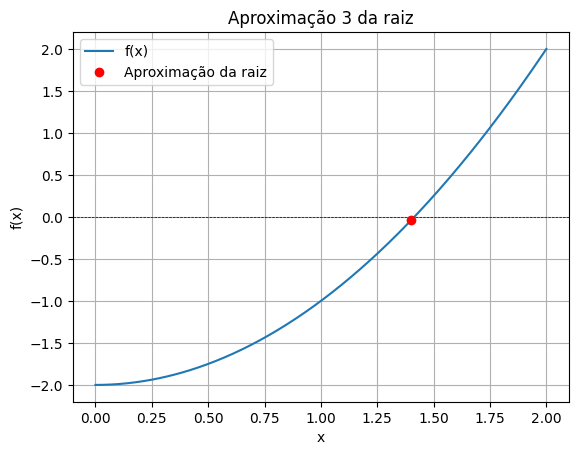

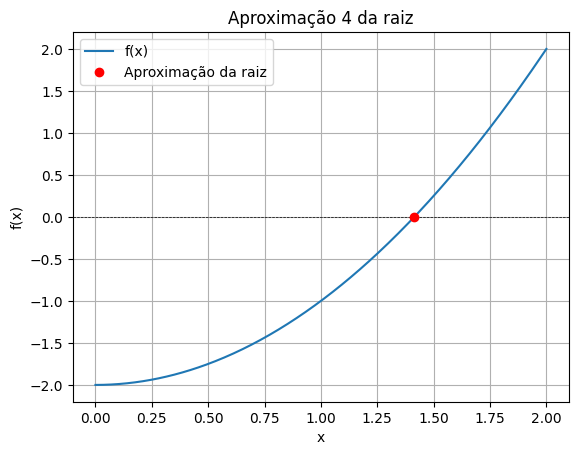

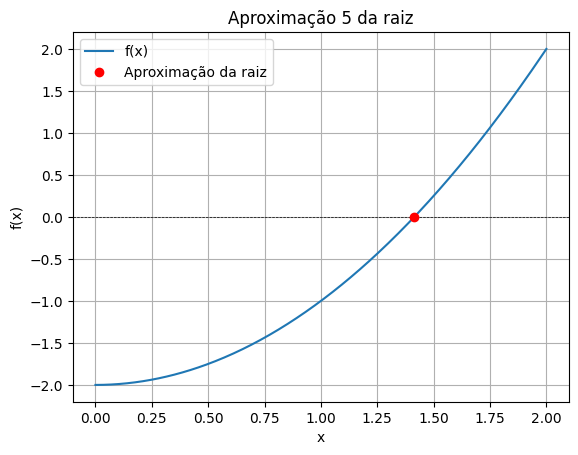

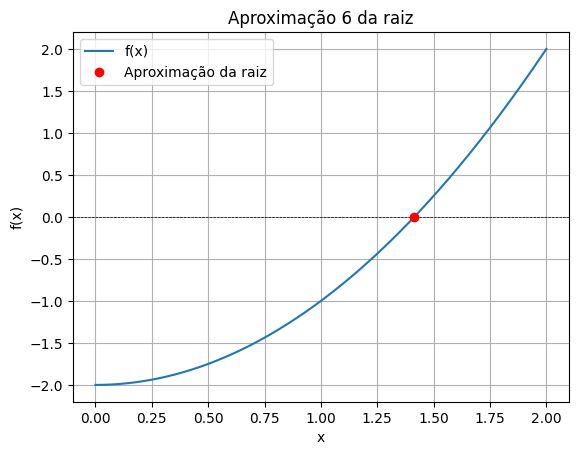

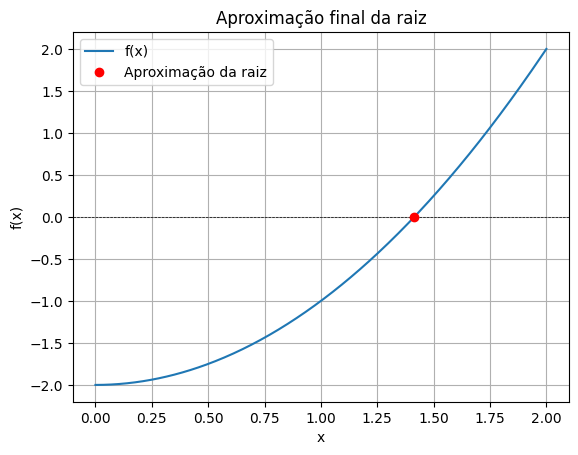

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Função para o método da secante
def secante(f, x0, x1, tol=1e-7, max_iter=100):
    """
    Encontra uma raiz da função f usando o método da secante.

    O método da secante é um método numérico para encontrar raízes de funções que utiliza
    uma aproximação linear baseada em dois pontos iniciais.

    Parâmetros:
    f : função
        A função para a qual se deseja encontrar a raiz.
    x0 : float
        O primeiro ponto inicial.
    x1 : float
        O segundo ponto inicial.
    tol : float
        A tolerância para o critério de parada.
    max_iter : int
        O número máximo de interações permitidas.
    
    Retorna:
    list: Uma lista contendo todas as aproximações geradas durante o processo.
    
    Lança:
        ValueError: Se o número máximo de iterações for atingido sem convergência.
        ZeroDivisionError: Se a diferença entre f(x1) e f(x0) for muito pequena.
    """
    lista_de_aproximacoes = [x0, x1]
    for _ in range(max_iter):
        if abs(f(x1) - f(x0)) < 1e-14:
            raise ValueError("Divisão por zero no método da secante")
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        lista_de_aproximacoes.append(x2)
        if abs(x2 - x1) < tol:
            return lista_de_aproximacoes
        x0, x1 = x1, x2
    raise ValueError("Número máximo de iterações atingido")
    
aproximacoes = secante(lambda x: x**2 - 2, 1, 2)
print(aproximacoes[-1])
def plotar_func_e_ponto(f, ponto, x_min, x_max, title):
    x = np.linspace(x_min, x_max, 400)
    y = f(x)
    plt.plot(x, y, label='f(x)')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.plot(ponto, f(ponto), 'ro', label='Aproximação da raiz')
    plt.title(f'{title}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid()
    plt.show()

plotar_func_e_ponto(lambda x: x**2 - 2, aproximacoes[0], 0, 2, "Aproximação incicial x0")
plotar_func_e_ponto(lambda x: x**2 - 2, aproximacoes[1], 0, 2, "Aproximação incicial x1")
for i in range(2, len(aproximacoes)):
    if i == len(aproximacoes) - 1:
        plotar_func_e_ponto(lambda x: x**2 - 2, aproximacoes[i], 0, 2, f"Aproximação final da raiz")
    else:
        plotar_func_e_ponto(lambda x: x**2 - 2, aproximacoes[i], 0, 2, f"Aproximação {i} da raiz")

1.4142141342163086


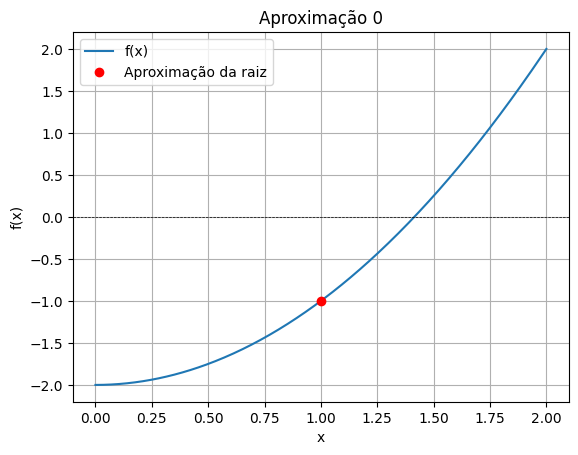

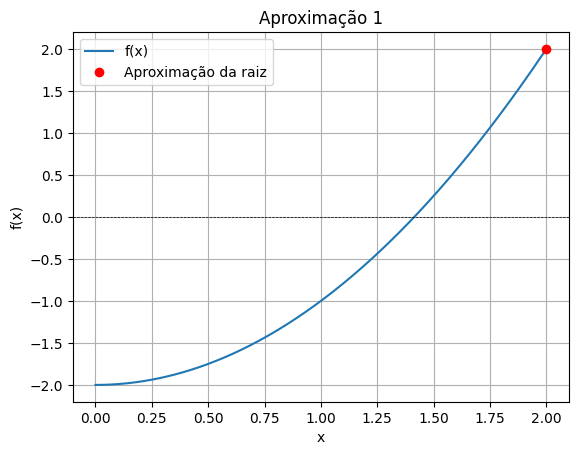

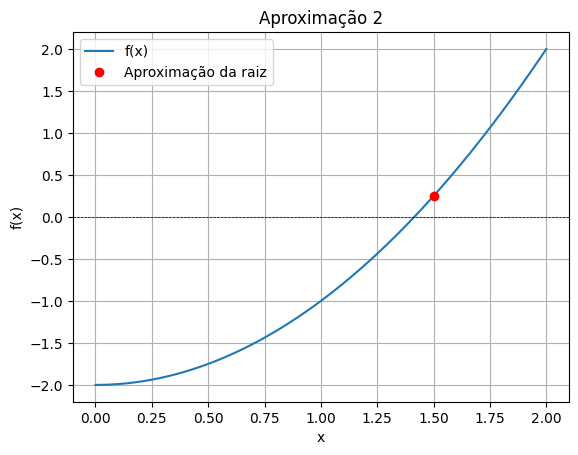

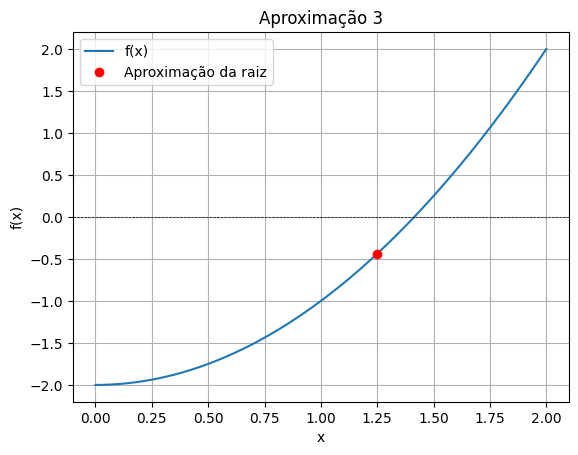

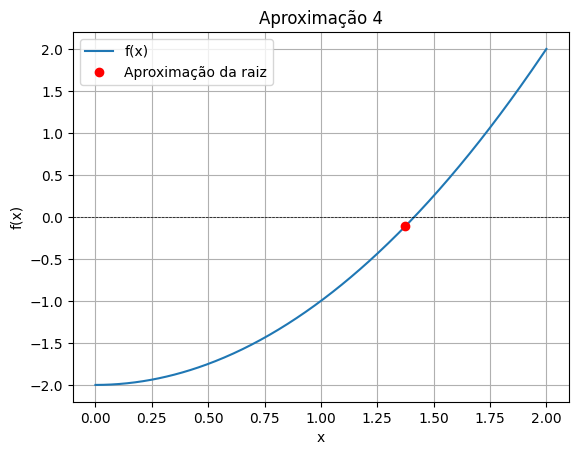

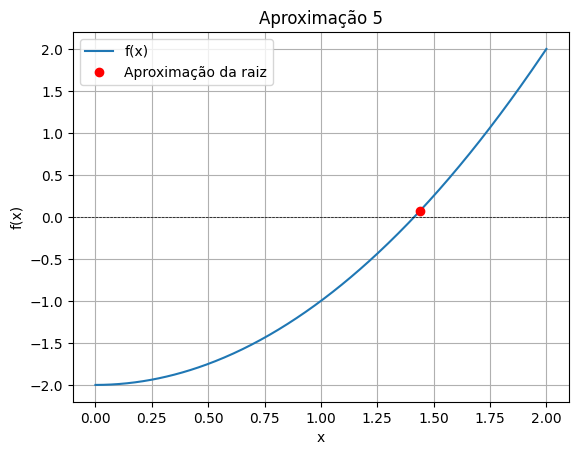

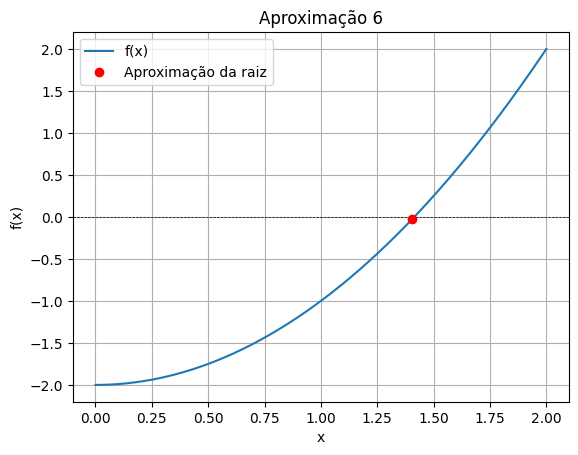

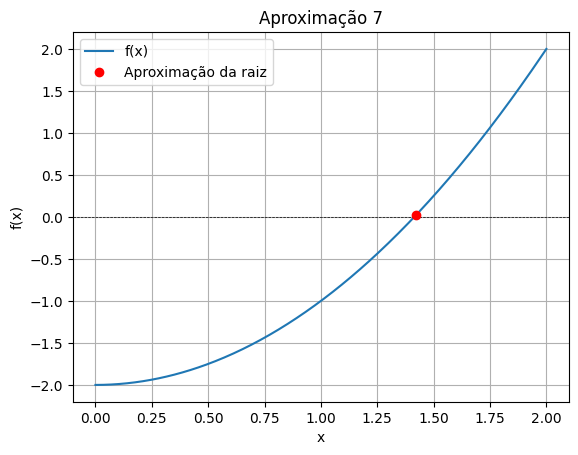

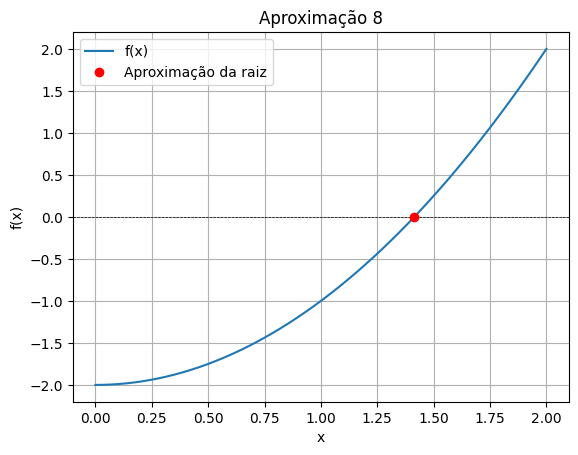

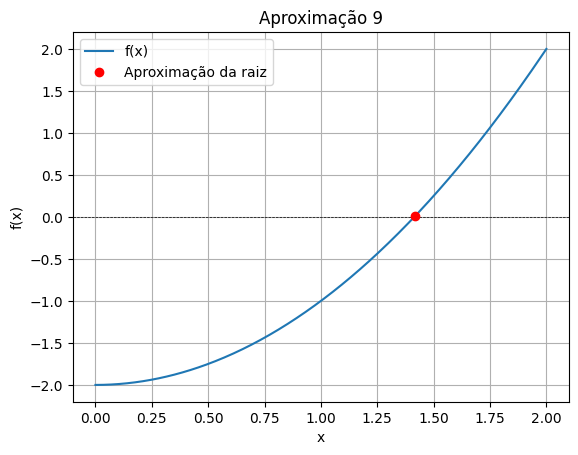

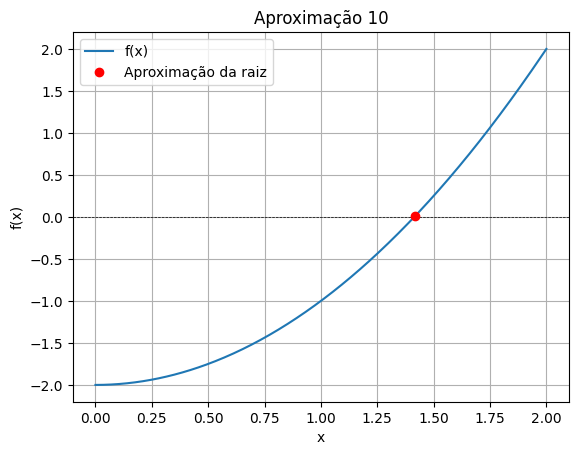

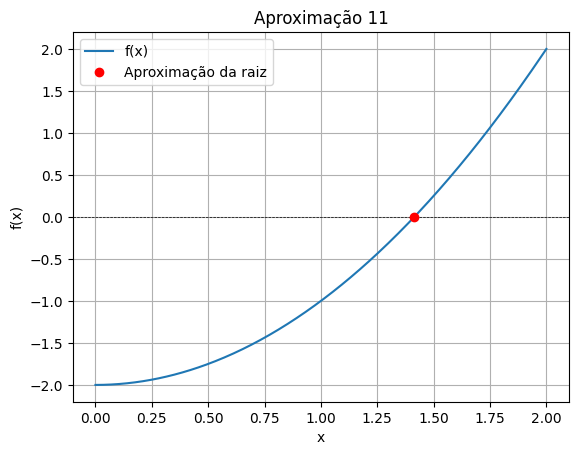

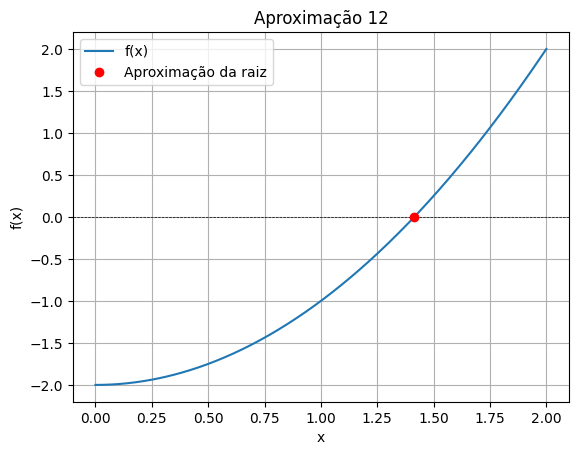

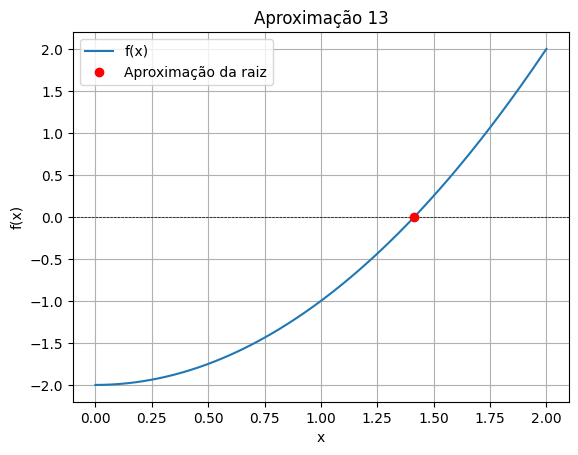

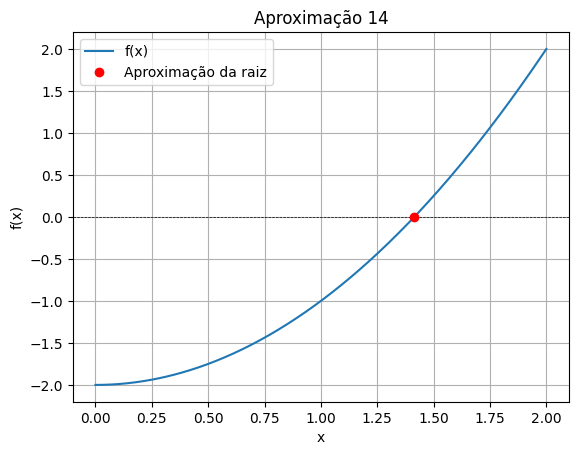

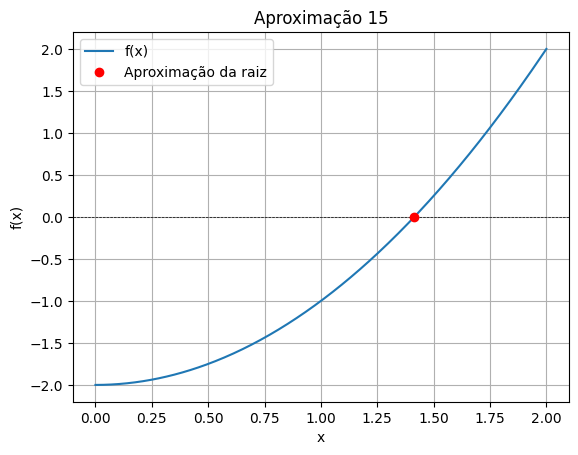

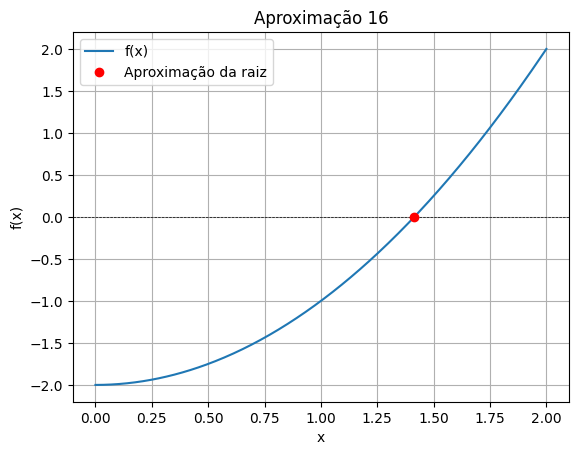

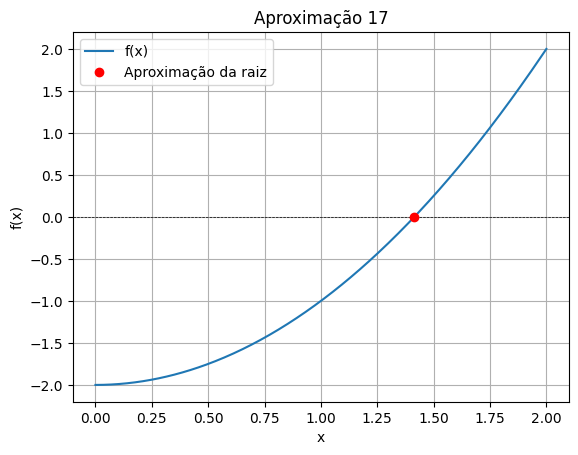

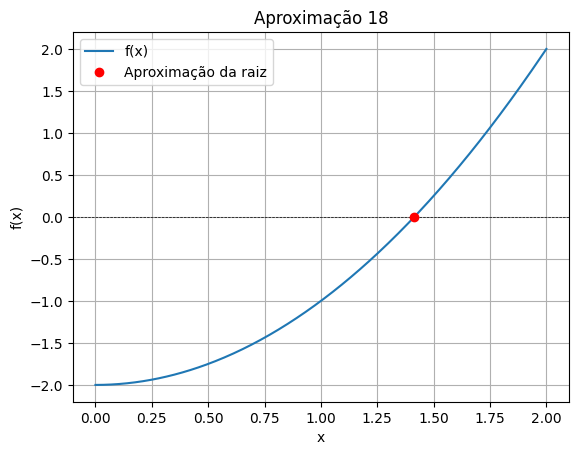

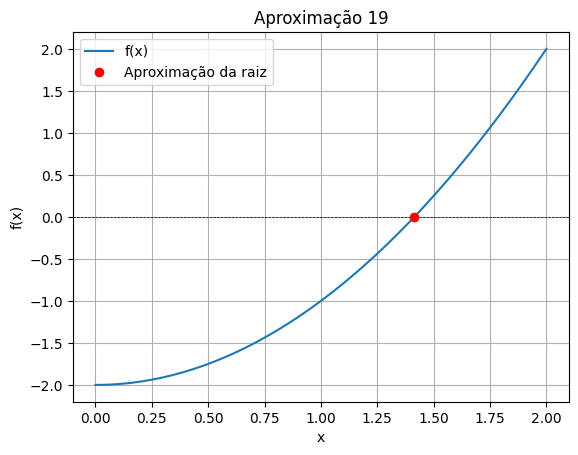

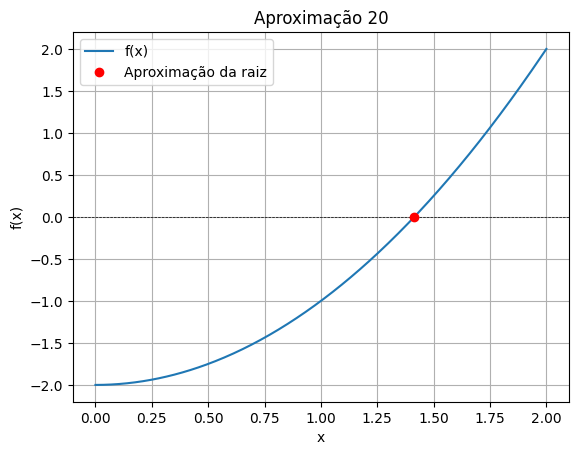

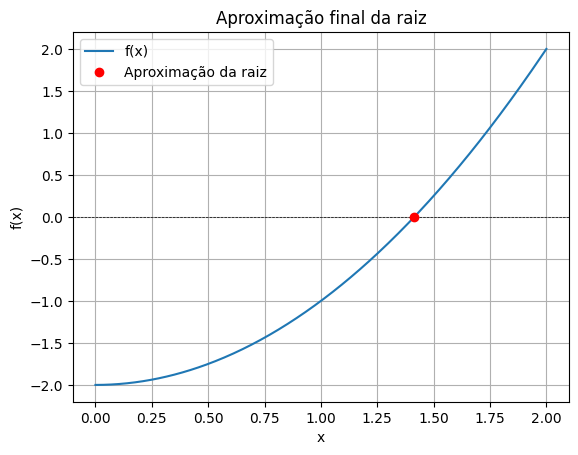

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Função para o método da bisseção
def bissecao(f, a, b, tol=1e-6, max_iter=100):
    """
    Encontra uma raiz de f(x) = 0 no intervalo [a, b] usando o método da bisseção.
    
    Args:
        f (callable): Função contínua definida como f(x).
        a (float): Limite inferior do intervalo.
        b (float): Limite superior do intervalo.
        tol (float, opcional): Tolerância para o erro. Padrão é 1e-6.
        max_iter (int, opcional): Número máximo de iterações. Padrão é 100.

    Returns:
        list: Lista com as aproximações da raiz de f(x) = 0 a cada iteração.

    Raises:
        TypeError: Se o parâmetro f não for uma função.
        ValueError: Se tol <= 0 ou max_iter <= 0.
        ValueError: Se f(a) e f(b) não tiverem sinais opostos.
        RuntimeError: Se o número máximo de iterações for atingido sem convergência.
    """
    if not callable(f):
        raise TypeError("O parâmetro f deve ser uma função.")
    if not isinstance(max_iter, int):
        raise TypeError("O número máximo de iterações deve ser inteiro.")
    if tol <= 0:
        raise ValueError("A tolerância deve ser positiva.")
    if max_iter <= 0:
        raise ValueError("O número máximo de iterações deve ser positivo.")
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) e f(b) devem ter sinais opostos.")
    
    lista_de_aproximacoes = [a, b]

    for _ in range(max_iter):
        x_m = (a + b) / 2
        lista_de_aproximacoes.append(x_m)
        f_m = f(x_m)
        
        if abs(f_m) < tol or (b - a) / 2 < tol:
            return lista_de_aproximacoes
        
        if f(a) * f_m < 0:
            b = x_m
        else:
            a = x_m
    
    raise RuntimeError("Número máximo de iterações atingido sem convergência.")


## Função para plotar a função e os pontos
def plotar_func_e_ponto(f, ponto, x_min, x_max, title):
    x = np.linspace(x_min, x_max, 400)
    y = f(x)
    plt.plot(x, y, label='f(x)')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.plot(ponto, f(ponto), 'ro', label='Aproximação da raiz')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid()
    plt.show()


## Exemplo de uso
f = lambda x: x**2 - 2
aproximacoes = bissecao(f, 1, 2)

print(aproximacoes[-1])
# Plota cada aproximação
for i, ponto in enumerate(aproximacoes):
    if i == len(aproximacoes) - 1:
        titulo = "Aproximação final da raiz"
    else:
        titulo = f"Aproximação {i}"
    plotar_func_e_ponto(f, ponto, 0, 2, titulo)


1.4142135623730951


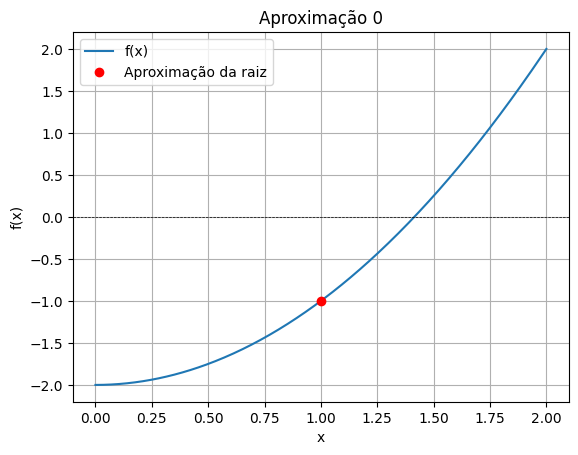

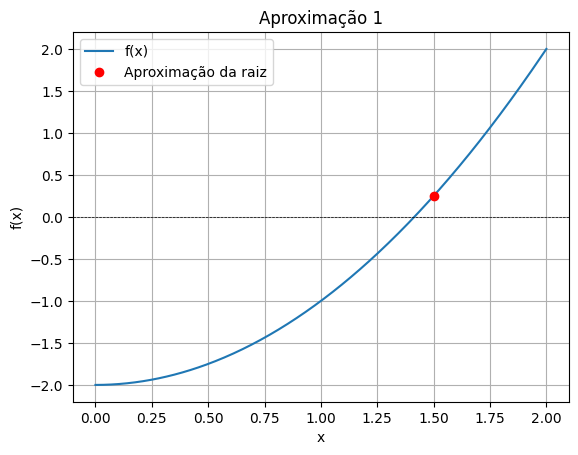

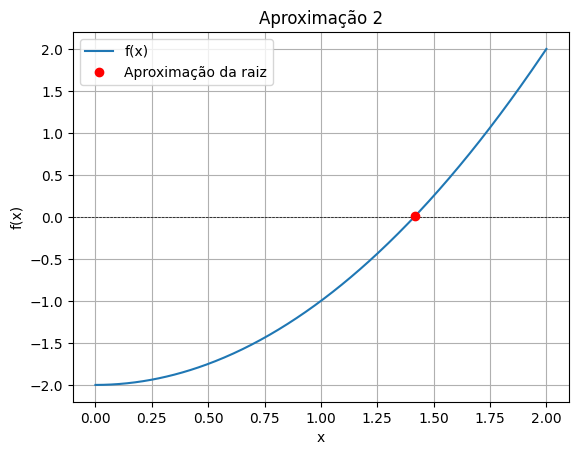

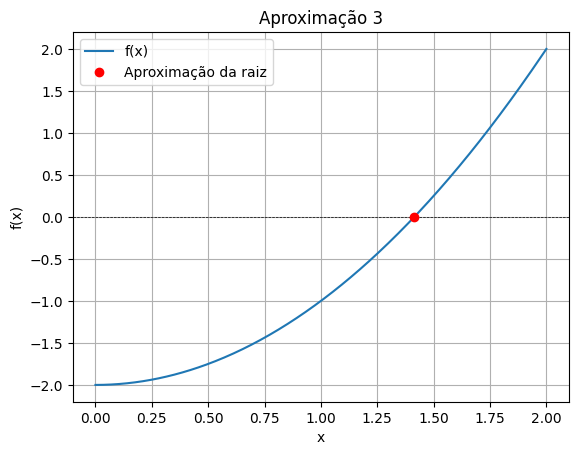

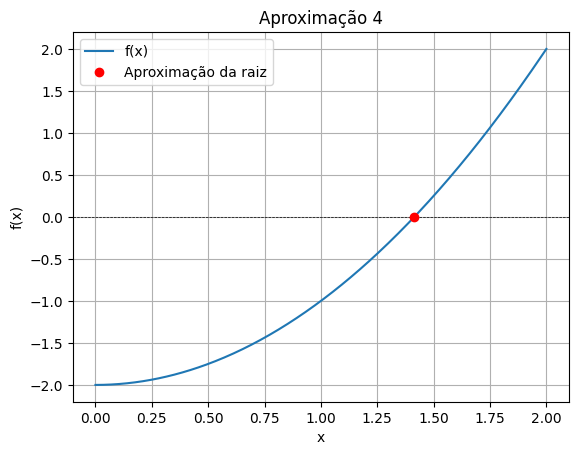

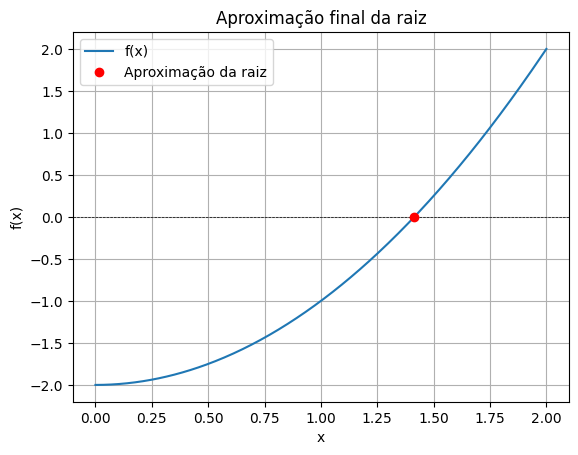

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def newton_raphson(f, x0, tol=1e-6, max_iter=100, df=None):
    """
    Método de Newton-Raphson para encontrar uma raiz de f(x) = 0.

    Args:
        f (callable): Função definida como f(x).
        x0 (float): Aproximação inicial.
        tol (float, opcional): Tolerância para o erro (critério de parada). Padrão é 1e-6.
        max_iter (int, opcional): Número máximo de iterações. Padrão é 100.
        df (callable, opcional): Derivada de f(x); se None, será calculada numericamente.

    Returns: 
        list: Lista com todas as aproximações geradas até a convergência.
    
    Raises:
        TypeError: Se o parâmetro f não for uma função.
        TypeError: Se o número de iterações não for inteiro.
        ValueError: Se a tolerância não for positiva.
        ValueError: Se o número máximo de iterações não for positivo.
        ZeroDivisionError: Se a derivada for nula em algum ponto utilizado.
        RuntimeError: Se o número máximo de iterações for atingido sem convergência.
    """
    if not callable(f):
        raise TypeError("O parâmetro f deve ser uma função.")
    if not isinstance(max_iter, int):
        raise TypeError("O número máximo de iterações deve ser inteiro.")
    if tol <= 0:
        raise ValueError("A tolerância deve ser positiva.")
    if max_iter <= 0:
        raise ValueError("O número máximo de iterações deve ser positivo.")

    # Derivada numérica (caso não seja passada)
    if df is None:
        def df(x, h=1e-6):
            return (f(x + h) - f(x - h)) / (2 * h)

    lista_de_aproximacoes = [x0]

    for _ in range(max_iter):
        f_x = f(x0)
        df_x = df(x0)

        if df_x == 0:
            raise ZeroDivisionError(f"Derivada nula — método falha em x = {x0:.6f}")

        x1 = x0 - f_x / df_x
        lista_de_aproximacoes.append(x1)

        if abs(x1 - x0) < tol:
            return lista_de_aproximacoes

        x0 = x1

    raise RuntimeError("Número máximo de iterações atingido sem convergência.")


def plotar_func_e_ponto(f, ponto, x_min, x_max, titulo):
    x = np.linspace(x_min, x_max, 400)
    y = f(x)
    plt.plot(x, y, label='f(x)')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.plot(ponto, f(ponto), 'ro', label='Aproximação da raiz')
    plt.title(titulo)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid()
    plt.show()


f = lambda x: x**2 - 2
df = lambda x: 2*x
aproximacoes = newton_raphson(f, 1, df=df)
print(aproximacoes[-1])

for i, ponto in enumerate(aproximacoes):
    if i == len(aproximacoes) - 1:
        titulo = "Aproximação final da raiz"
    else:
        titulo = f"Aproximação {i}"
    plotar_func_e_ponto(f, ponto, 0, 2, titulo)
